In [497]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
%matplotlib inline
import matplotlib.pyplot as plt

import spacy
import preprocess_kgptalkie as ps  # import the cleaning package
import re  # regex
from sklearn import set_config
set_config(display="diagram")

import nltk
import nltk.corpus
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
plt.style.use('seaborn-whitegrid')
import squarify

import plotly.express as px


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [498]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [499]:
df = pd.read_csv("../web_scrap_database/peterobi_data.csv",usecols=[0,1,2,4,5])
df.shape

(20001, 5)

In [500]:
pd.set_option('display.max_columns', None)
df.head()

,User,user_location,Date Created,Source of Tweet,Tweet
0,ODAVID09926893,NaN,2022-08-15 23:57:31+00:00,Twitter Web App,In the same way he will emerge as the winner 🏆...
1,obiohaline,"Assemblis Of God Church, Lagos",2022-08-15 23:55:19+00:00,Twitter for Android,"Heavenly Father, I pray that the son of the bo..."
2,Uchenna03108301,Lagos,2022-08-15 23:55:08+00:00,Twitter for Android,[Nigeria News App] Vanguard News: Orji Kalu sl...
3,Diran38135448,NaN,2022-08-15 23:55:01+00:00,Twitter for Android,@mayeesq Absolutely correct! That's most of us...
4,Thonia68343802,"Federal Capital Territory, Nig",2022-08-15 23:27:27+00:00,Twitter for Android,"@adeyanjudeji Wow,so you are now amongst Kenya..."


In [501]:
df.dtypes

User               object
user_location      object
Date Created       object
Source of Tweet    object
Tweet              object
dtype: object

In [502]:
df['Date Created'] = pd.to_datetime(df['Date Created'])
df

,User,user_location,Date Created,Source of Tweet,Tweet
0,ODAVID09926893,NaN,2022-08-15 23:57:31+00:00,Twitter Web App,In the same way he will emerge as the winner 🏆...
1,obiohaline,"Assemblis Of God Church, Lagos",2022-08-15 23:55:19+00:00,Twitter for Android,"Heavenly Father, I pray that the son of the bo..."
2,Uchenna03108301,Lagos,2022-08-15 23:55:08+00:00,Twitter for Android,[Nigeria News App] Vanguard News: Orji Kalu sl...
3,Diran38135448,NaN,2022-08-15 23:55:01+00:00,Twitter for Android,@mayeesq Absolutely correct! That's most of us...
4,Thonia68343802,"Federal Capital Territory, Nig",2022-08-15 23:27:27+00:00,Twitter for Android,"@adeyanjudeji Wow,so you are now amongst Kenya..."
...,...,...,...,...,...
19996,StatiSensePoll,Nigeria,2022-04-13 08:56:44+00:00,Twitter for Android,"IN YOUR OPINION, NIGERIA'S BEST OPTION FOR 202..."
19997,leakblast,Nigeria,2022-04-13 08:26:44+00:00,WordPress.com,Election 2023: Buhari’s Govt Selfish And Unpro...
19998,ActivistOzovehe,NIGERIA,2022-04-13 08:25:46+00:00,Twitter for Android,The politicians are presenting themselves and ...
19999,eljayee2003,NaN,2022-04-13 08:17:59+00:00,Twitter for iPhone,If you are based in Nigeria and voting at the ...


In [503]:
# def get_clean(x):
#     x = str(x).lower().replace('\\', '').replace('_', ' ')
#     x = ps.cont_exp(x)
#     x = ps.remove_emails(x)
#     x = ps.remove_urls(x)
#     x = ps.remove_html_tags(x)
#     x = ps.remove_rt(x)
#     x = ps.remove_accented_chars(x)
#     x = ps.remove_special_chars(x)
#     x = re.sub("(.)\\1{2,}", "\\1", x)
#     return x

In [504]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [505]:
df['tweet'] = df.Tweet.apply(lambda x: clean_tweets(x))
df.tweet

0        In the same way he will emerge as the winner 🏆...
1        Heavenly Father, I pray that the son of the bo...
2        [Nigeria News App] Vanguard News: Orji Kalu sl...
3         Absolutely correct! That's most of us blieve ...
4         Wow,so you are now amongst Kenya Electoral bo...
                               ...                        
19996    IN YOUR OPINION, NIGERIA'S BEST OPTION FOR 202...
19997    Election 2023: Buhari’s Govt Selfish And Unpro...
19998    The politicians are presenting themselves and ...
19999    If you are based in Nigeria and voting at the ...
20000    Peter Obi is the best choice nigeria has going...
Name: tweet, Length: 20001, dtype: object

In [506]:
sentiments = SentimentIntensityAnalyzer()
df['Positive'] = df['tweet'].apply(lambda x: sentiments.polarity_scores(x)['pos'])
df['Negetive'] = df['tweet'].apply(lambda x: sentiments.polarity_scores(x)['neu'])
df['Neutral'] = df['tweet'].apply(lambda x: sentiments.polarity_scores(x)['neg'])
df['compound'] = df['tweet'].apply(lambda x: sentiments.polarity_scores(x)['compound'])

In [507]:
score = df.compound.values
sentiment = []
for i in score:
    if i >=0.05 :
        sentiment.append('positive')
    elif i <= -0.05:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

In [508]:
df['sentiment']= sentiment

In [509]:
df.head()

,User,user_location,Date Created,Source of Tweet,Tweet,tweet,Positive,Negetive,Neutral,compound,sentiment
0,ODAVID09926893,NaN,2022-08-15 23:57:31+00:00,Twitter Web App,In the same way he will emerge as the winner 🏆...,In the same way he will emerge as the winner 🏆...,0.137,0.863,0.000,0.5859,positive
1,obiohaline,"Assemblis Of God Church, Lagos",2022-08-15 23:55:19+00:00,Twitter for Android,"Heavenly Father, I pray that the son of the bo...","Heavenly Father, I pray that the son of the bo...",0.111,0.847,0.042,0.5994,positive
2,Uchenna03108301,Lagos,2022-08-15 23:55:08+00:00,Twitter for Android,[Nigeria News App] Vanguard News: Orji Kalu sl...,[Nigeria News App] Vanguard News: Orji Kalu sl...,0.106,0.792,0.102,0.0258,neutral
3,Diran38135448,NaN,2022-08-15 23:55:01+00:00,Twitter for Android,@mayeesq Absolutely correct! That's most of us...,Absolutely correct! That's most of us blieve ...,0.291,0.604,0.105,0.8679,positive
4,Thonia68343802,"Federal Capital Territory, Nig",2022-08-15 23:27:27+00:00,Twitter for Android,"@adeyanjudeji Wow,so you are now amongst Kenya...","Wow,so you are now amongst Kenya Electoral bo...",0.172,0.757,0.070,0.5994,positive


In [510]:
df['sentiment'] = sentiment
df_cleaned = df.iloc[:,[1,2,3,5,10]]
df_cleaned

,user_location,Date Created,Source of Tweet,tweet,sentiment
0,NaN,2022-08-15 23:57:31+00:00,Twitter Web App,In the same way he will emerge as the winner 🏆...,positive
1,"Assemblis Of God Church, Lagos",2022-08-15 23:55:19+00:00,Twitter for Android,"Heavenly Father, I pray that the son of the bo...",positive
2,Lagos,2022-08-15 23:55:08+00:00,Twitter for Android,[Nigeria News App] Vanguard News: Orji Kalu sl...,neutral
3,NaN,2022-08-15 23:55:01+00:00,Twitter for Android,Absolutely correct! That's most of us blieve ...,positive
4,"Federal Capital Territory, Nig",2022-08-15 23:27:27+00:00,Twitter for Android,"Wow,so you are now amongst Kenya Electoral bo...",positive
...,...,...,...,...,...
19996,Nigeria,2022-04-13 08:56:44+00:00,Twitter for Android,"IN YOUR OPINION, NIGERIA'S BEST OPTION FOR 202...",positive
19997,Nigeria,2022-04-13 08:26:44+00:00,WordPress.com,Election 2023: Buhari’s Govt Selfish And Unpro...,negative
19998,NIGERIA,2022-04-13 08:25:46+00:00,Twitter for Android,The politicians are presenting themselves and ...,negative
19999,NaN,2022-04-13 08:17:59+00:00,Twitter for iPhone,If you are based in Nigeria and voting at the ...,negative


In [511]:
df_cleaned.sentiment.value_counts().to_frame()

,sentiment
positive,11243
negative,5991
neutral,2767


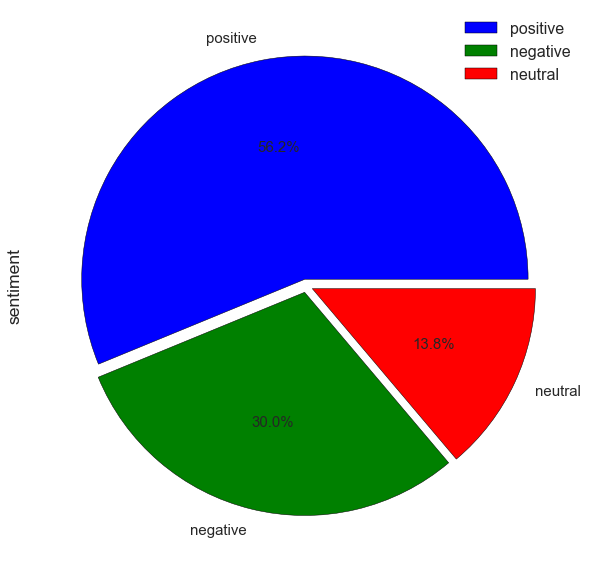

In [512]:
fig,ax = plt.subplots(figsize = (20,10))
df_cleaned.sentiment.value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode=[0.03,0.03,0.03],textprops={'fontsize': 15})
ax.legend()

In [513]:
df_cleaned.sentiment.value_counts().to_frame()

,sentiment
positive,11243
negative,5991
neutral,2767


<AxesSubplot:ylabel='sentiment'>

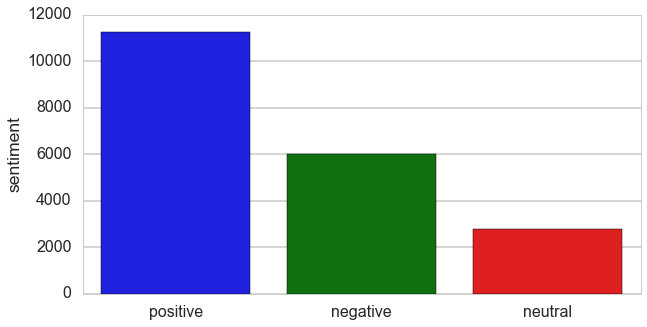

In [514]:
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data = df_cleaned.sentiment.value_counts().to_frame(), y = df_cleaned.sentiment.value_counts().to_frame().sentiment,\
    x =df_cleaned.sentiment.value_counts().to_frame().index)

In [515]:
df_cleaned['sentiment_encoded'] = df_cleaned.sentiment.apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)

C:\Users\godwi\AppData\Local\Temp\ipykernel_16936\3273574070.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [516]:
df_cleaned

,user_location,Date Created,Source of Tweet,tweet,sentiment,sentiment_encoded
0,NaN,2022-08-15 23:57:31+00:00,Twitter Web App,In the same way he will emerge as the winner 🏆...,positive,1
1,"Assemblis Of God Church, Lagos",2022-08-15 23:55:19+00:00,Twitter for Android,"Heavenly Father, I pray that the son of the bo...",positive,1
2,Lagos,2022-08-15 23:55:08+00:00,Twitter for Android,[Nigeria News App] Vanguard News: Orji Kalu sl...,neutral,0
3,NaN,2022-08-15 23:55:01+00:00,Twitter for Android,Absolutely correct! That's most of us blieve ...,positive,1
4,"Federal Capital Territory, Nig",2022-08-15 23:27:27+00:00,Twitter for Android,"Wow,so you are now amongst Kenya Electoral bo...",positive,1
...,...,...,...,...,...,...
19996,Nigeria,2022-04-13 08:56:44+00:00,Twitter for Android,"IN YOUR OPINION, NIGERIA'S BEST OPTION FOR 202...",positive,1
19997,Nigeria,2022-04-13 08:26:44+00:00,WordPress.com,Election 2023: Buhari’s Govt Selfish And Unpro...,negative,-1
19998,NIGERIA,2022-04-13 08:25:46+00:00,Twitter for Android,The politicians are presenting themselves and ...,negative,-1
19999,NaN,2022-04-13 08:17:59+00:00,Twitter for iPhone,If you are based in Nigeria and voting at the ...,negative,-1


In [517]:
mapping = pd.pivot_table(data =df_cleaned , index ='user_location' , columns = 'sentiment', values= 'sentiment_encoded',aggfunc='count')
mapping

sentiment,negative,neutral,positive
user_location,,,
,3.0,NaN,3.0
,1.0,NaN,5.0
\n🏠 🇳🇬 \n📍 🇬🇧,NaN,1.0,NaN
,NaN,NaN,1.0
Lagos Nigeria Lekki,NaN,1.0,NaN
...,...,...,...
📍PeterObi FC,1.0,NaN,NaN
📍Port Harcourt,NaN,NaN,1.0
📧thesalamidayo@gmail.com,1.0,NaN,NaN


In [518]:
location_sentiment = df_cleaned
Top_location = location_sentiment.pivot_table(index ='user_location', columns ='sentiment',\
    values ='sentiment_encoded',aggfunc='count').sort_values('positive',ascending=False)[:20]
Top_location.reset_index()

sentiment,user_location,negative,neutral,positive
0,Nigeria,668.0,443.0,1594.0
1,"Lagos, Nigeria",427.0,252.0,1012.0
2,"Abuja, Nigeria",140.0,89.0,368.0
3,Lagos,67.0,28.0,145.0
4,"Federal Capital Territory, Nig",36.0,18.0,100.0
5,"Port Harcourt, Nigeria",34.0,14.0,100.0
6,Abuja,37.0,31.0,87.0
7,"Ibadan, Nigeria",17.0,8.0,57.0
8,Lagos Nigeria,33.0,17.0,56.0
9,Earth,25.0,9.0,54.0


In [519]:
Top_location.reset_index().sum()

sentiment
user_location    NigeriaLagos, NigeriaAbuja, NigeriaLagosFedera...
negative                                                    1713.0
neutral                                                     1047.0
positive                                                    3981.0
dtype: object

In [520]:
tweet_source = df_cleaned['Source of Tweet'].value_counts().to_frame()[:5]
tweet_source

,Source of Tweet
Twitter for Android,12419
Twitter for iPhone,3461
Twitter Web App,1987
NigeriaVotes,817
WordPress.com,564


<AxesSubplot:ylabel='Source of Tweet'>

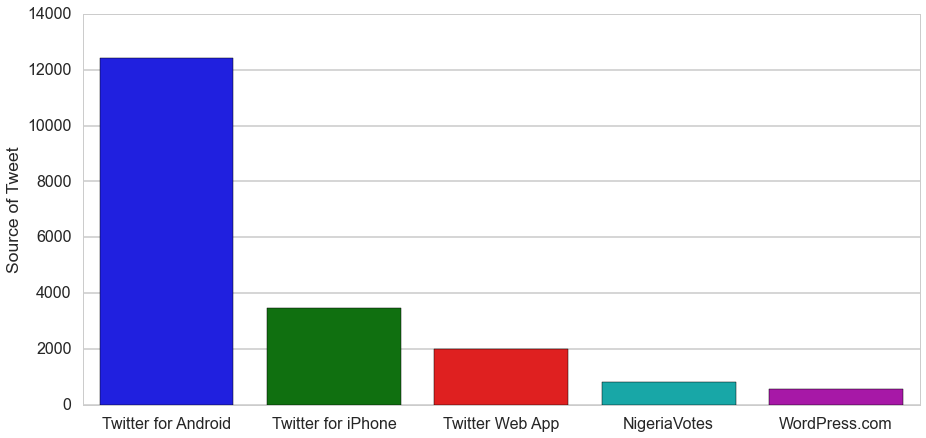

In [521]:
fig,ax = plt.subplots(figsize =(15,7))
sns.barplot(data =tweet_source, y = tweet_source['Source of Tweet'], x= tweet_source.index)

In [522]:
# from string import hexdigits
# from turtle import heading, width


# fig = px.bar(tweet_source)
# fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
# fig.show()

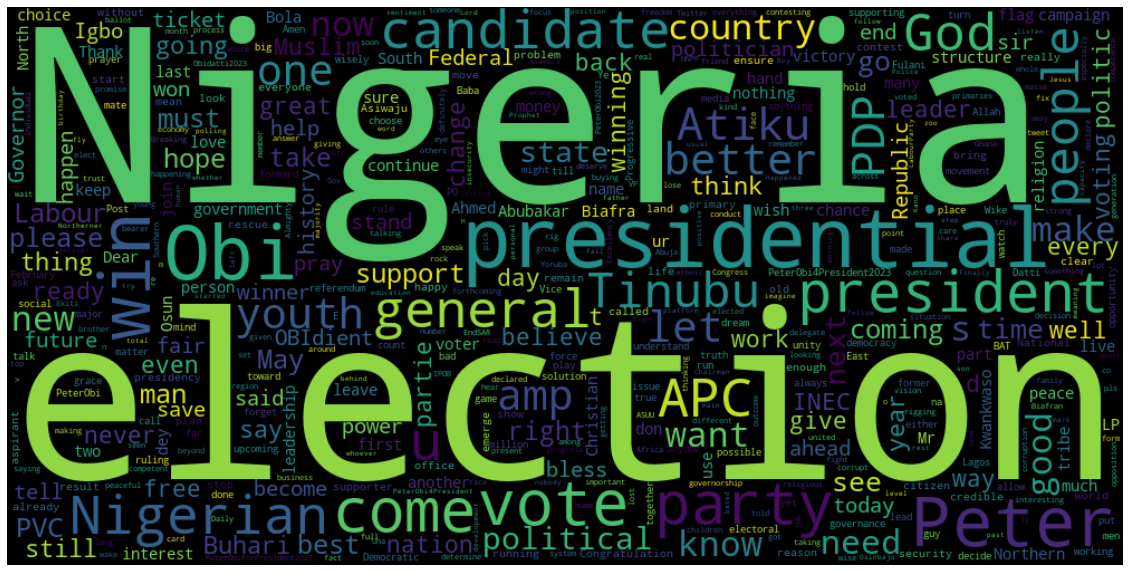

In [523]:
from wordcloud import WordCloud, STOPWORDS
import collections

stopwords = STOPWORDS
stopwords.add('I')

text = "".join(df_cleaned.loc[:,['tweet','sentiment']][df_cleaned.loc[:,['tweet','sentiment']].sentiment == 'positive'].tweet)
fig, ax = plt.subplots(figsize = (20,20))
wc = WordCloud(stopwords=stopwords,max_words = 500 , width = 1000 , height = 500,collocations=False).generate(text)
plt.axis("off")
ax.imshow(wc);

In [524]:
filtered_words = [word for word in text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(9):
    words.append(letter)
    counts.append(count)

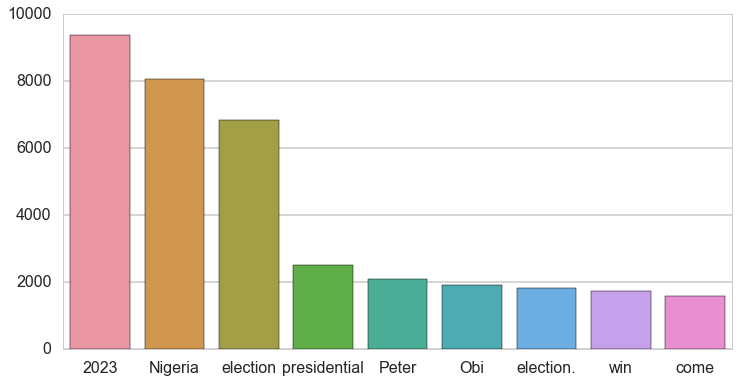

In [525]:
fig,ax =plt.subplots(figsize = (12,6))
sns.barplot(x = words, y = counts)
plt.show()

In [526]:
df_cleaned['Date Created'].sort_values(ascending= True)

20000   2022-04-13 08:00:00+00:00
19999   2022-04-13 08:17:59+00:00
19998   2022-04-13 08:25:46+00:00
19997   2022-04-13 08:26:44+00:00
19996   2022-04-13 08:56:44+00:00
                   ...           
4       2022-08-15 23:27:27+00:00
3       2022-08-15 23:55:01+00:00
2       2022-08-15 23:55:08+00:00
1       2022-08-15 23:55:19+00:00
0       2022-08-15 23:57:31+00:00
Name: Date Created, Length: 20001, dtype: datetime64[ns, UTC]

In [533]:
candidate = []
for i in df_cleaned.tweet:
    if 'tinubu' in i:
        candidate.append(i)
        

In [534]:
candidate

["I can't wait for next year election to come around.\nWhere party  A will will win on twitter and giving speechs\nparty  B will win during campaigns \nParty C will win final results \nNigeria is a comedy centre \n\nEven tinubu, Reno, Atiku, obideints, Peter obi, 2023 elections,Peter",
 'Peter obi will get low northerner votes in 2023 presidential election. Northerners will give Thier votes to tinubu. Nigeria youth should wake up now,unite to pick the best presidential candidate and make our northerner brothers support us.',
 ' You and your tinubu, Peter obi and Atiku will failed come 2023 election because Nigeria collapse',
 '  I thought hausas and fulanis were foolish until tinubu decided to contest 2023 election. Mehn yoruba are so so so so foolish. Everything about your support for Tinubu is tribalistic. How would you think that a man who can stand on its will put Nigeria in place?',
 ' May Allah bless me and my family abundantly and bless Nigeria and make sure atiku and tinubu nev

In [587]:
peterobi_1 = df_cleaned[df_cleaned.tweet.str.contains('peterobi')]
peterobi_2 = df_cleaned[df_cleaned.tweet.str.contains('obi')]
peterobi_3 = df_cleaned[df_cleaned.tweet.str.contains('peter obi')]
peterobi_4 = df_cleaned[df_cleaned.tweet.str.contains('obidient')]

obi = pd.concat([peterobi_1,peterobi_2,peterobi_3,peterobi_4]).drop_duplicates()
obi.sentiment.value_counts()


positive    413
negative    169
neutral      58
Name: sentiment, dtype: int64

In [581]:
atiku_1 = df_cleaned[df_cleaned.tweet.str.contains('atiku')]
atiku_2 = df_cleaned[df_cleaned.tweet.str.contains('atiku abubakar ')]
atiku = pd.concat([atiku_1,atiku_2]).drop_duplicates()


In [580]:
bat_1 = df_cleaned[df_cleaned.tweet.str.contains('asiwajubolaahmed')]
bat_2 = df_cleaned[df_cleaned.tweet.str.contains('tinubu')]
bat_3 = df_cleaned[df_cleaned.tweet.str.contains('BAT')]
bat_4 = df_cleaned[df_cleaned.tweet.str.contains('jagaban')]

bat = pd.concat([peterobi_1,peterobi_2,peterobi_3,peterobi_4]).drop_duplicates()


In [583]:
inec_1 = df_cleaned[df_cleaned.tweet.str.contains('inec')]
inec_2 = df_cleaned[df_cleaned.tweet.str.contains('inecnigeria')]

inec = pd.concat([inec_1,inec_2]).drop_duplicates()

In [585]:
aspirants = pd.concat([obi,atiku,bat,inec]).drop_duplicates()
aspirants

,user_location,Date Created,Source of Tweet,tweet,sentiment,sentiment_encoded
982,NaN,2022-08-11 10:18:25+00:00,Twitter for Android,So Peter Obi is ENDSARS Presidential candidate...,neutral,0
1388,Nigeria,2022-08-09 05:00:47+00:00,Twitter for Android,An imagination just hit my head!\n\nWhen Peter...,positive,1
1637,NaN,2022-08-07 12:45:45+00:00,Twitter Web App,Me and my entire family will vote for Peter Ob...,negative,-1
1638,NIGERIA,2022-08-07 12:43:32+00:00,Twitter for iPhone,"Peter Obi, Tinubu not capable to save Nigeria....",negative,-1
1672,World,2022-08-07 09:41:27+00:00,TweetDeck,Follow this debate:\n\n2023 Election: Competen...,neutral,0
...,...,...,...,...,...,...
18062,eSwatini and Washington DC,2022-05-11 11:56:29+00:00,IFTTT,"RT AfricaBizRadio: 📣 New Podcast! ""Nigerian Po...",positive,1
18063,Africa,2022-05-11 11:53:17+00:00,Spreaker,"📣 New Podcast! ""Nigerian Political Parties Req...",positive,1
18539,eSwatini and Washington DC,2022-05-06 13:56:22+00:00,IFTTT,"RT AfricaBizRadio: 📣 New Podcast! ""Political P...",positive,1
18542,Africa,2022-05-06 13:20:38+00:00,Spreaker,"📣 New Podcast! ""Political Parties Given One Mo...",positive,1
